In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [9]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [10]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [11]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [12]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [13]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


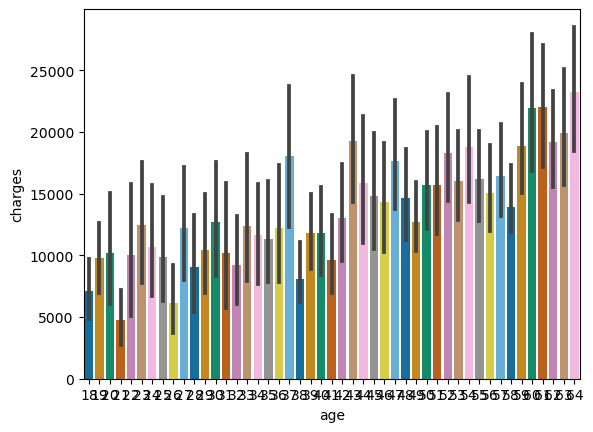

In [14]:
sns.barplot(x='age',y='charges',data=df,palette='colorblind')
plt.show()

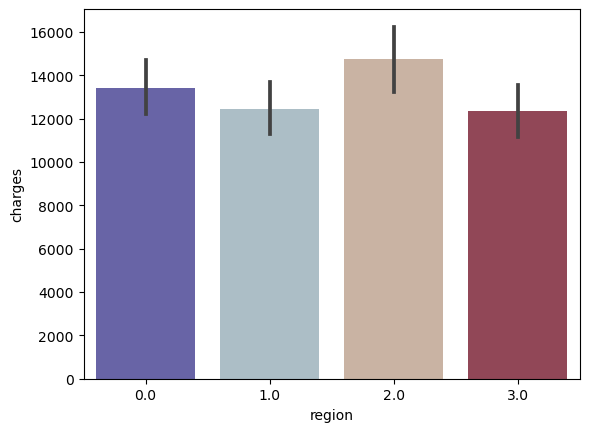

In [15]:
sns.barplot(x='region',y='charges',data=df,palette='twilight_shifted')
plt.show()

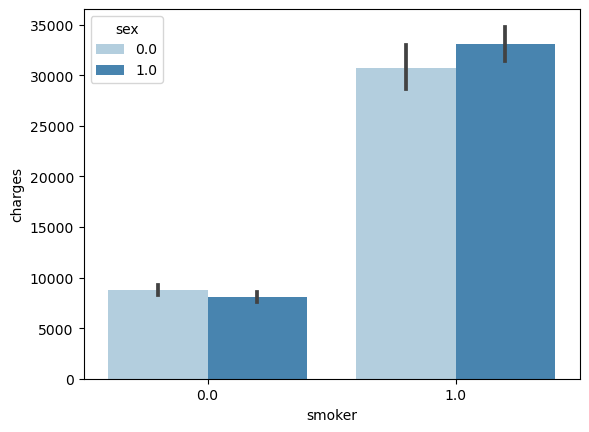

In [16]:
sns.barplot(x='smoker',y='charges',data=df,palette='Blues',hue='sex')
plt.show()

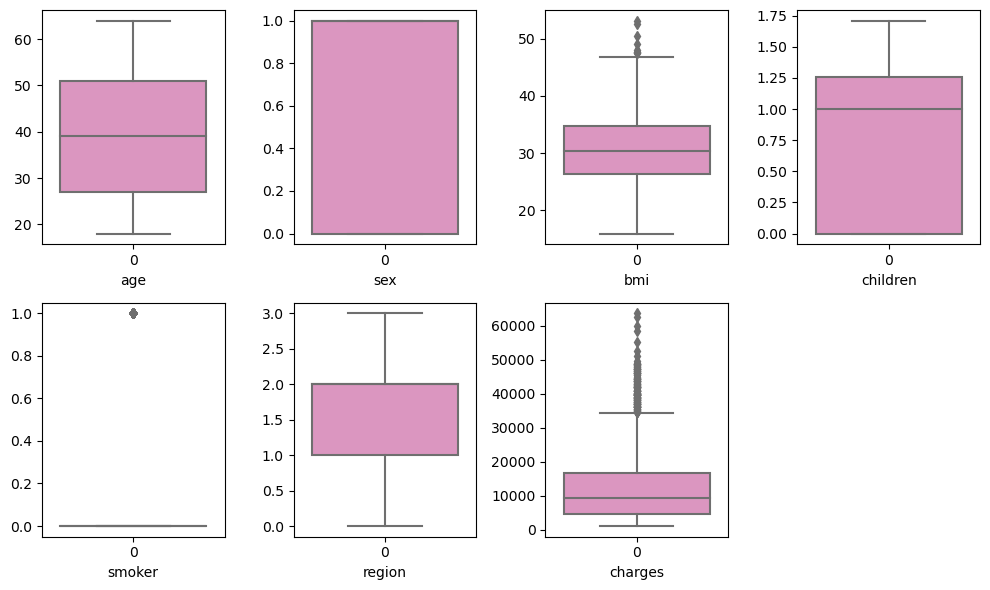

In [30]:
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for c in df.columns:
    if plotnumber <= 7:
        x=plt.subplot(2,4,plotnumber)
        sns.boxplot(df[c], palette = "Set2_r")
        plt.xlabel(c, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

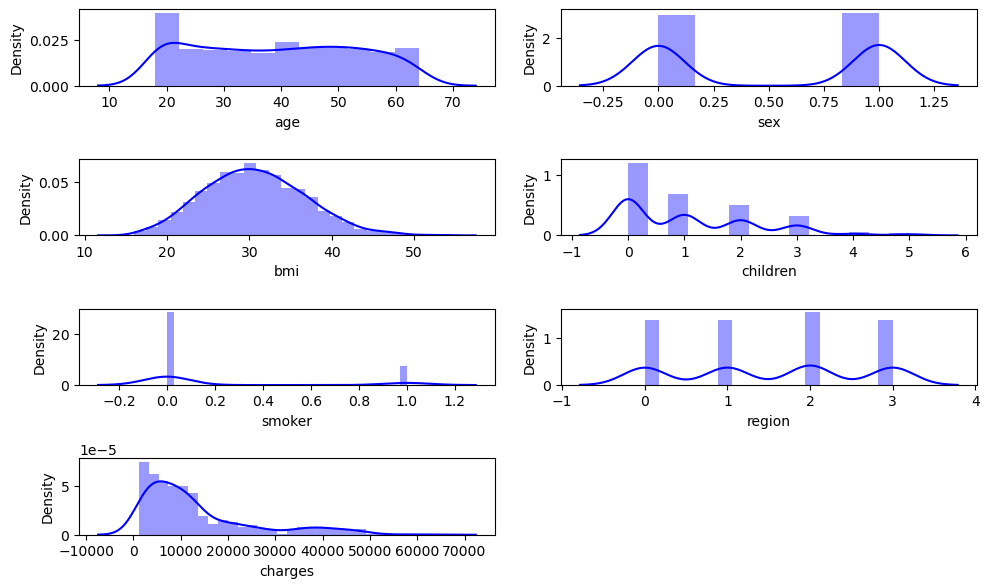

In [17]:
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for c in df.columns:
    if plotnumber <= 7:
        x=plt.subplot(4,2,plotnumber)
        sns.distplot(df[c],color = "b")
        plt.xlabel(c, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [18]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

In [19]:
df['children']=np.cbrt(df['children'])
df['smoker']=np.cbrt(df['smoker'])

In [20]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children   -0.097116
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

In [21]:
df['smoker']=np.sqrt(df['smoker'])

In [22]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children   -0.097116
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

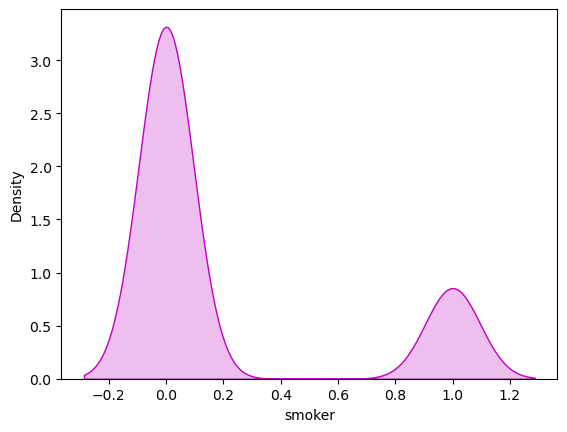

In [23]:
#since there is not enough change in smoker skewness we will set treshold at 1.464766
sns.distplot(df['smoker'], color='m', kde_kws={"shade":True}, hist=False)
plt.show()

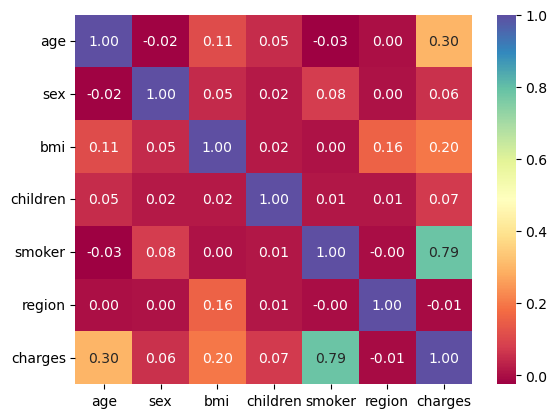

In [24]:
corr = df.corr()
sns.heatmap(corr,annot=True,fmt='0.2f',cmap='Spectral')
plt.show()

In [25]:
corr['charges'].sort_values(ascending = False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.072756
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

In [45]:
x = df.drop('charges', axis =1)
y = df['charges']

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-1.117604,1.970587,1.343905
1,-1.509965,0.989591,0.509621,0.502009,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.218282,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-1.117604,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-1.117604,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.218282,-0.507463,-0.466915
1334,-1.509965,-1.010519,0.206139,-1.117604,-0.507463,-1.372326
1335,-1.509965,-1.010519,1.014878,-1.117604,-0.507463,0.438495
1336,-1.296362,-1.010519,-0.797813,-1.117604,-0.507463,1.343905


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.015956,age
1,1.008844,sex
2,1.040656,bmi
3,1.003101,children
4,1.006551,smoker
5,1.025881,region


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [49]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print(maxAccu," at ",maxRS)

0.802332357392094  at  112


In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = maxRS)

In [52]:
lr = LinearRegression()
lr.fit(x_train,y_train)
plr = lr.predict(x_test)
ptrain = lr.predict(x_train)
print(lr)
print('r2_score :',r2_score(y_test,plr))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_squared_error :',mean_squared_error(y_test,plr))
print('mean_absolute_error :',mean_absolute_error(y_test,plr))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,plr)))

LinearRegression()
r2_score : 0.802332357392094
r2_score on train data : 72.58228197212337
mean_squared_error : 30159165.107792746
mean_absolute_error : 3934.6640140157483
root mean squared error : 5491.736074120164


In [56]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
prfr = rfr.predict(x_test)
ptrain = rfr.predict(x_train)
print(rfr)
print('r2_score :',r2_score(y_test,prfr))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,prfr))
print('mean_squared_error :',mean_squared_error(y_test,prfr))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,prfr)))

RandomForestRegressor()
r2_score : 0.8946626935106681
r2_score on train data : 97.2892704100143
mean_absolute_error : 2281.255430367143
mean_squared_error : 16071852.613346562
root mean squared error : 4008.971515656673


In [57]:
knn = KNN()
knn.fit(x_train,y_train)
pknn = knn.predict(x_test)
ptrain = knn.predict(x_train)
print(knn)
print('r2_score :',r2_score(y_test,pknn))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,pknn))
print('mean_squared_error :',mean_squared_error(y_test,pknn))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pknn)))

KNeighborsRegressor()
r2_score : 0.8579413220145166
r2_score on train data : 85.24244044910148
mean_absolute_error : 3004.1493179925374
mean_squared_error : 21674620.42767134
root mean squared error : 4655.600973845519


In [59]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pgbr = gbr.predict(x_test)
ptrain = gbr.predict(x_train)
print(gbr)
print('r2_score :',r2_score(y_test,pgbr))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,pgbr))
print('mean_squared_error :',mean_squared_error(y_test,pgbr))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pgbr)))

GradientBoostingRegressor()
r2_score : 0.9129416607510816
r2_score on train data : 89.20974656760883
mean_absolute_error : 2178.534345181388
mean_squared_error : 13282936.917634634
root mean squared error : 3644.576370119665


In [60]:
lasso = Lasso()
lasso.fit(x_train,y_train)
plasso = lasso.predict(x_test)
ptrain = lasso.predict(x_train)
print(lasso)
print('r2_score :',r2_score(y_test,plasso))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,plasso))
print('mean_squared_error :',mean_squared_error(y_test,plasso))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,plasso)))

Lasso()
r2_score : 0.8023418721336144
r2_score on train data : 72.58227732642119
mean_absolute_error : 3934.5101115853035
mean_squared_error : 30157713.39492418
root mean squared error : 5491.6039000390565


In [61]:
ridge = Ridge()
ridge.fit(x_train,y_train)
pridge = ridge.predict(x_test)
ptrain = ridge.predict(x_train)
print(ridge)
print('r2_score :',r2_score(y_test,pridge))
print('r2_score on train data :',r2_score(y_train,ptrain)*100)
print('mean_absolute_error :',mean_absolute_error(y_test,pridge))
print('mean_squared_error :',mean_squared_error(y_test,pridge))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pridge)))

Ridge()
r2_score : 0.8023335733690957
r2_score on train data : 72.58218970060463
mean_absolute_error : 3936.4756508565874
mean_squared_error : 30158979.579950765
root mean squared error : 5491.7191825466425


In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
score = cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,plr)-score.mean())*100)

[0.76100043 0.7073409  0.77828138 0.73451944 0.75348367]
0.7469251650437994
Diff b/w R2 and cross val score is : 5.540719234829461


In [65]:
score = cross_val_score(rfr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,prfr)-score.mean())*100)

[0.85143348 0.77554376 0.86653656 0.82605672 0.85639529]
0.8351931612744302
Diff b/w R2 and cross val score is : 5.946953223623785


In [66]:
score = cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,pknn)-score.mean())*100)

[0.82667616 0.75663998 0.84164698 0.79858305 0.81751886]
0.8082130067640275
Diff b/w R2 and cross val score is : 4.972831525048904


In [67]:
score = cross_val_score(gbr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,pgbr)-score.mean())*100)

[0.87510887 0.79067137 0.89426987 0.84897872 0.85978416]
0.8537625965298702
Diff b/w R2 and cross val score is : 5.917906422121144


In [68]:
score = cross_val_score(lasso,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,plasso)-score.mean())*100)

[0.76100721 0.70737812 0.77826011 0.73451413 0.75349238]
0.7469303909550751
Diff b/w R2 and cross val score is : 5.5411481178539335


In [69]:
score = cross_val_score(ridge,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Diff b/w R2 and cross val score is :",(r2_score(y_test,pridge)-score.mean())*100)

[0.76100963 0.70745244 0.7781613  0.73457584 0.75345625]
0.7469310932801921
Diff b/w R2 and cross val score is : 5.540248008890359


In [72]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1, 0.2],
              'max_depth': [3, 5, 7],}

In [73]:
gscv = GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

In [75]:
gscv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [76]:
Model = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 50)
Model.fit(x_train,y_train)
pred = Model.predict(x_test)
print('r2_score :',r2_score(y_test,pred))
print('mean_absolute_error :',mean_absolute_error(y_test,pred))
print('mean_squared_error :',mean_squared_error(y_test,pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))

r2_score : 0.9150883594651747
mean_absolute_error : 2200.781917142224
mean_squared_error : 12955404.094857745
root mean squared error : 3599.361623240675


In [78]:
import pickle
filename = 'Insurance.pkl'
pickle.dump(Model,open(filename,'wb'))

In [79]:
load_model = pickle.load(open('Insurance.pkl','rb'))
result = load_model.score(x_test,y_test)
print(result*100)

91.50883594651748
